<a href="https://colab.research.google.com/github/Ohsoo46/AIFFEL_QUEST/blob/main/regression_2day_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   https://www.kaggle.com/code/sudhirnl7/linear-regression-tutoria



In [28]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = "whitegrid") # seaborn 스타일 적용

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'


In [29]:
# import dataset
# path = 'dataset/'
path = '/content/drive/MyDrive/ds6_kaggle/'  # 폴더 경로 지정
df = pd.read_csv(path + 'insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

# 데이터셋의 상위 행과 열 살펴보기: Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
# 데이터 구조확인- df.info()
print("Dataset Information:")
print("-" * 50)
df.info() #  각 컬럼 이름, 데이터 타입(dtype), 결측치(null 여부), 전체 행 수를 보여줌

# 수치형 변수의 통계 요약 - df.describe()
print("\nSummary Statistics(Numerical Columns):")
print("-" * 50)
print(df.describe()) # 숫자형 컬럼의 평균(mean), 표준편차(std), 최소/최대값, 분위수(25%, 50%, 75%) 표시

#범주형 변수의 기본 통계 요약: df. describe(include = 'object')
print("-" * 50)
print(df.describe(include = 'object')) # 문자형(범주형) 컬럼의 고유값 개수, 최빈값, 최빈값의 등장 횟수 표시

Dataset Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Summary Statistics(Numerical Columns):
--------------------------------------------------
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    

데이터 구조 복습

df.shape = (1338, 7)

→ 즉,

m = 1338 : 관측값(=행의 개수, 고객 수)

n = 7 : 변수의 개수

이 중에서

독립변수(입력 변수, X): age, sex, bmi, children, smoker, region → 총 6개

종속변수(타깃, y): charges (보험 청구 금액)

2. 다중 선형 회귀식 (Hypothesis Function)

다중선형회귀는 입력값이 여러 개인 선형식으로 표현  hθ​(xi​)=θ0​+θ1​xi1​+θ2​xi2​+...+θn​xin​

데이터셋 : hθ​(xi​)=θ0​+θ1​(age)+θ2​(sex)+θ3​(bmi)+θ4​(children)+θ5​(smoker)+θ6​(region)
< 참조 >
- θ0: 절편(intercept)
- θ1,θ2,…,θ6: 각 변수의 회귀계수(coefficient)
- hθ(xi): 예측된 보험료 (charges 예측값)

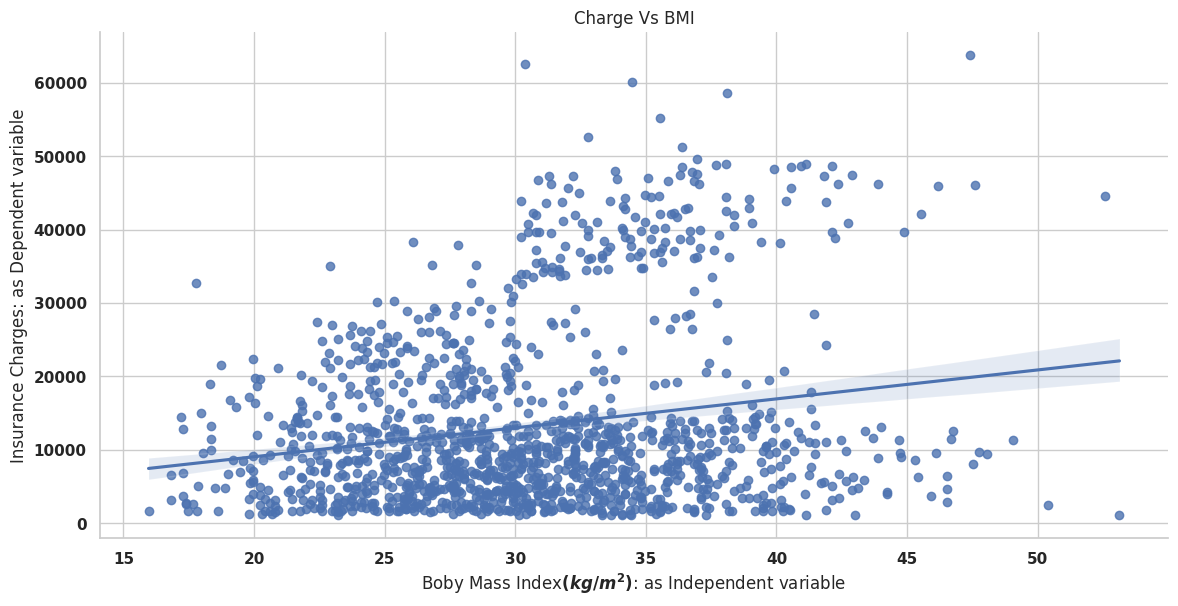

In [31]:
 '''시각화를 위한 seaborn 라이브러리를 사용하여 bmi(체질량지수)를 독립변수, charges(보험료) 종속변수 선형회귀'''
 sns.lmplot(x = 'bmi', y= 'charges', data = df, aspect = 2, height = 6) # Linear Model Plot
 plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable') # x축 이름 설정. kg을  m^2로 나눈값, 즉 BMI의 단위
 plt.ylabel('Insurance Charges: as Dependent variable') # y축 이름 설정.
 plt.title('Charge Vs BMI'); # 그래프 제목, "Charge vs BMI" = "보험료와 체질량지수의 관"

* EDA (Exploratory data analysis)

In [32]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


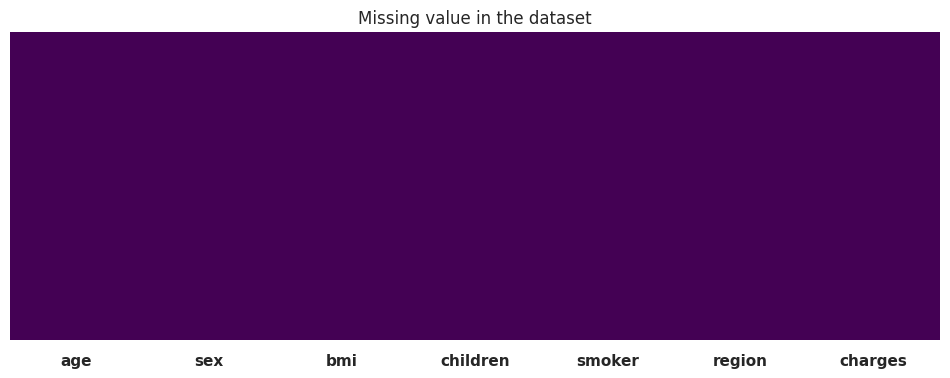

In [33]:
# check for missing value
plt.figure(figsize = (12,4)) # 그래프 전체 크기를 지정, 가로 12인치, 세로 4인치 크기의 캔버스 생성
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis',yticklabels = False)  # 결측치 여부를 True /False 로 표시하는 DataFrame을 반환
plt.title('Missing value in the dataset'); # 출력 결과 제목 설정

<!-- plt.figure(figsize=(12,4)) : 그래프 크기 조정
df.isnull() : 결측치 여부(True/False) 확인
sns.heatmap() : 결측치 위치를 색으로 시각화
cbar=False : 색상바 제거
cmap='viridis' : 색상 스타일 지정
yticklabels=False : y축 라벨 숨김
plt.title() : 그래프 제목 표시 -->

Kaggle에서 사용된 “정제된 insurance.csv” 버전과 Colab 동일하게 쓸 수 있도록 변환하는 코드(Label Encoding)

In [34]:

# # 1. 원본 데이터 확인
# df.info()

# # 2. Label Encoding 적용
# df_encoded = df.copy()  # 원본 보존

# # 문자열 → 숫자 매핑
# df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
# df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})

# # region은 4개의 범주형 변수이므로 원-핫 인코딩 (One-Hot Encoding)
# df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

# print("\nAfter Encoding:")
# df_encoded.info()

# # 4. 상관계수 계산
# corr = df_encoded.corr()

# # 5. 히트맵 시각화
# plt.figure(figsize=(10,6))
# sns.heatmap(corr, cmap='Wistia', annot=True)
# plt.title('Correlation Heatmap (After Encoding)')
# plt.show()

In [35]:
# Plots
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot = True);

ValueError: could not convert string to float: 'female'

/tmp/ipython-input-1676319271.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins = 50, color = 'r',ax = ax)
/tmp/ipython-input-1676319271.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']), bins = 40, color = 'b', ax = ax)


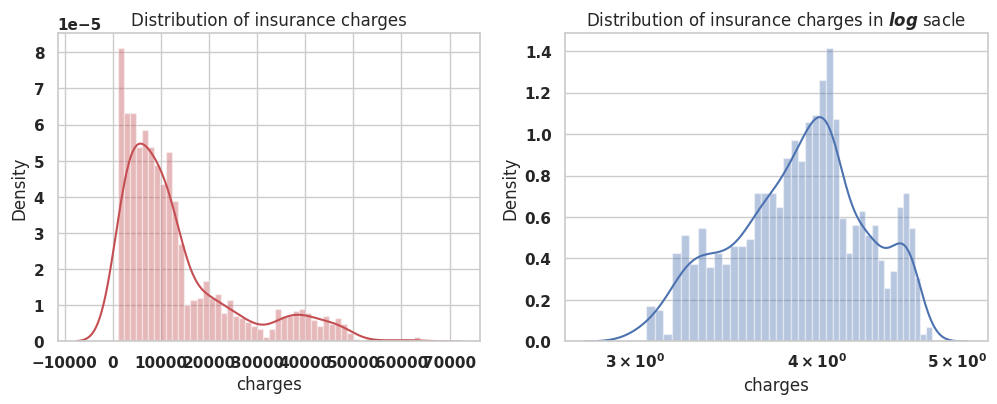

In [36]:
f = plt.figure(figsize = (12,4))

ax = f.add_subplot(121)
sns.distplot(df['charges'],bins = 50, color = 'r',ax = ax)
ax.set_title('Distribution of insurance charges')

ax = f.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins = 40, color = 'b', ax = ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

/tmp/ipython-input-3208527821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot (x ='sex', y = 'charges', data = df, palette = 'Wistia', ax = ax)
/tmp/ipython-input-3208527821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'smoker', y = 'charges', data = df, palette = 'magma', ax = ax)


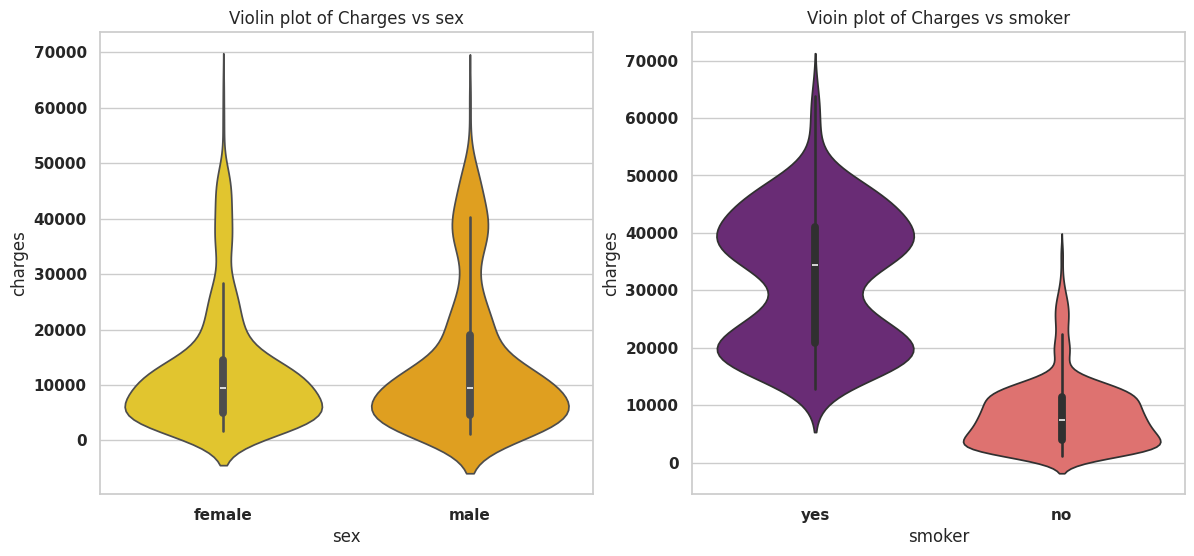

In [37]:
f = plt.figure(figsize = (14,6))
ax = f.add_subplot(121)
sns.violinplot (x ='sex', y = 'charges', data = df, palette = 'Wistia', ax = ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x = 'smoker', y = 'charges', data = df, palette = 'magma', ax = ax)
ax.set_title('Vioin plot of Charges vs smoker');

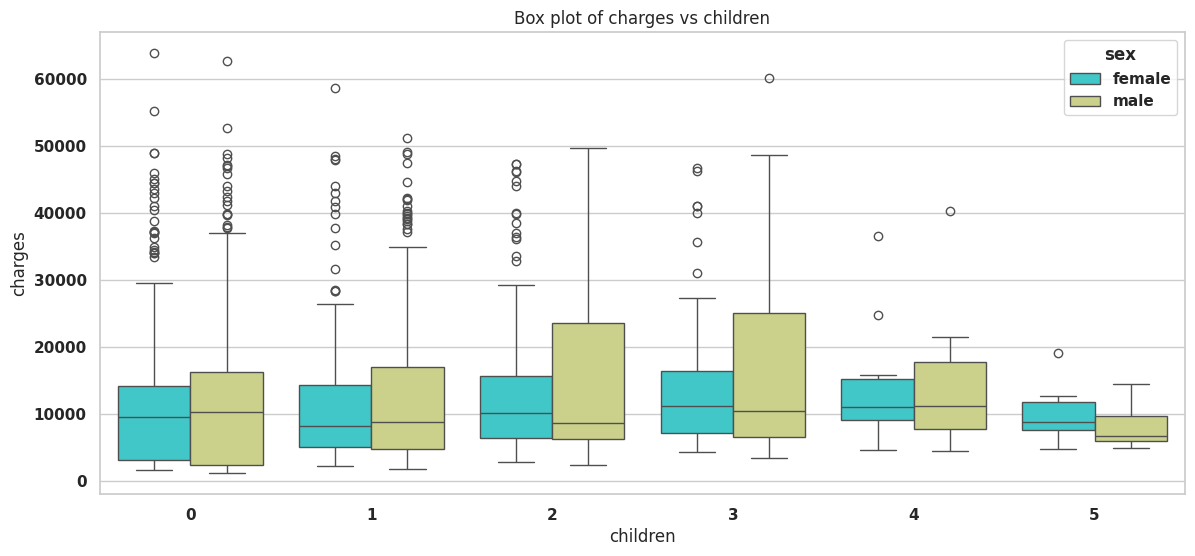

In [38]:
plt.figure(figsize = (14, 6))
sns.boxplot(x = 'children', y = 'charges', hue = 'sex', data = df, palette = 'rainbow')
plt.title('Box plot of charges vs children');


In [39]:
df.groupby('children')['charges'].agg(['mean', 'min','max'])

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


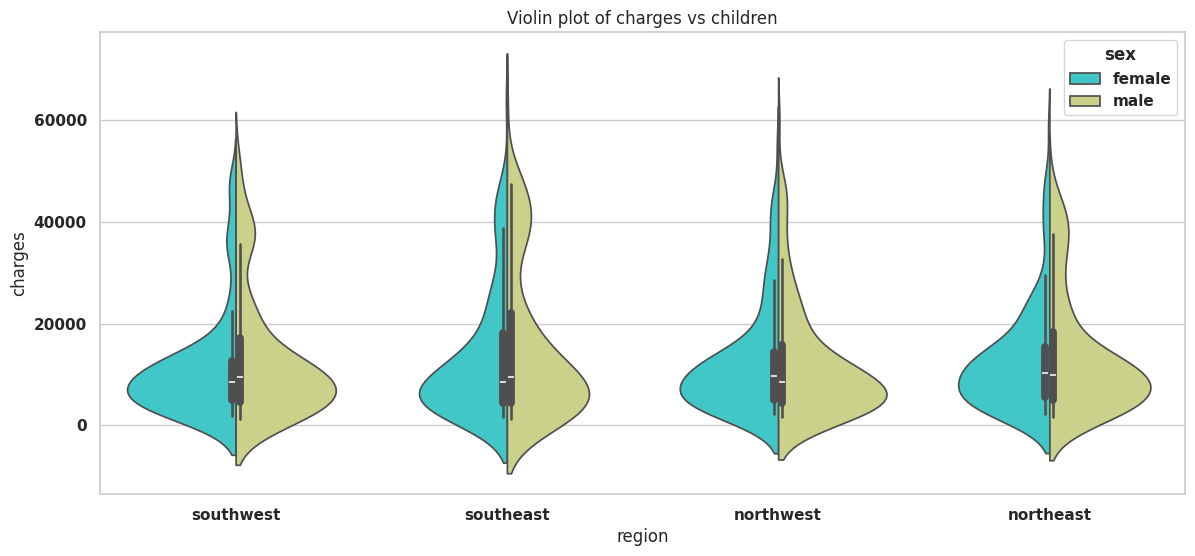

In [40]:
plt.figure(figsize =  (14, 6))
sns.violinplot(x = 'region', y = 'charges', hue = 'sex', data = df,palette = 'rainbow', split = True)
plt.title('Violin plot of charges vs children');

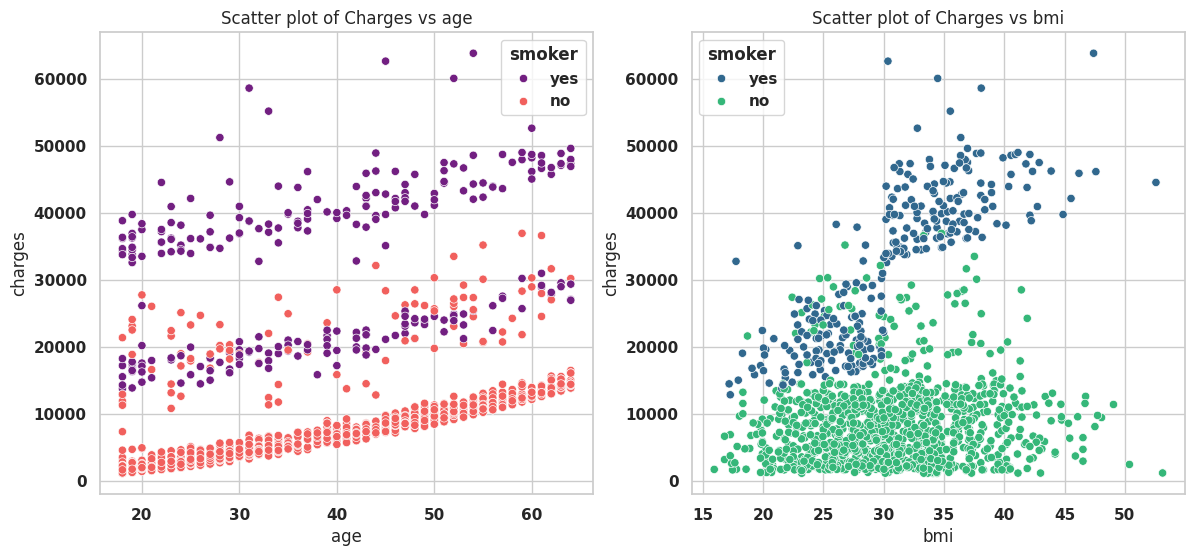

In [41]:
 f = plt.figure(figsize = (14,6))
 ax =  f.add_subplot(121)
 sns.scatterplot(x = 'age', y='charges', data = df,palette = 'magma', hue = 'smoker', ax = ax)
 ax.set_title('Scatter plot of Charges vs age')

 ax = f.add_subplot(122)
 sns.scatterplot(x = 'bmi', y = 'charges', data = df, palette = 'viridis', hue = 'smoker')
 ax.set_title('Scatter plot of Charges vs bmi')
 plt.savefig('sc.png');

In [44]:
# Dummy variable
categorical_columns  = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df,prefix = 'OHE', prefix_sep = '_',
            columns = categorical_columns,
            drop_first = True,
            dtype = 'int8')

In [45]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [46]:
from scipy.stats import boxcox
y_bc, lam, ci= boxcox(df_encode['charges'],alpha = 0.05)

ci,lam

((-0.011402906172930048, 0.09880968597673512),
 np.float64(0.043649061187374535))

In [47]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

Train Test split

In [49]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges', axis = 1) # Inddpendet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

Model building

In [51]:
# step 1: add x0 = 1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)), X_test]

#Step2: build model

theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))


In [52]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [53]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


In [55]:
# Normal equation
y_pred_norm = np.matmul(X_test_0, theta)

# Evaluvation:MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)


The Mean Square Error(MSE) or J(theta) is:  0.18729622322982065
R square obtain for normal equation method is : 0.7795687545055299


In [56]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.1872962232298189
R square obtain for scikit learn library is : 0.7795687545055319


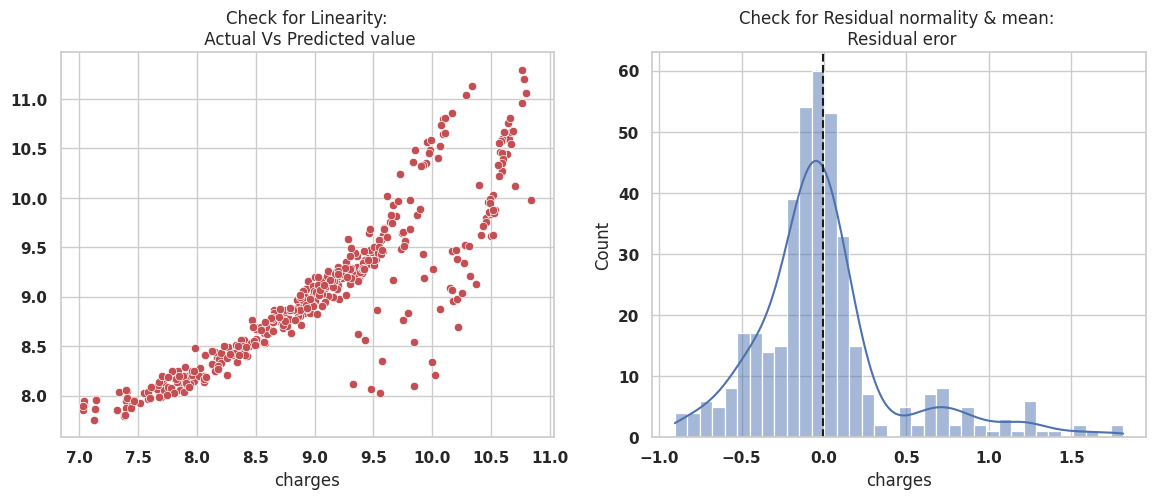

In [63]:
 #chect for Linearity
f = plt.figure(figsize = (14,5))

ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_sk), ax = ax, color = 'b', kde=True)  # 과거 함수: sns.distplot((y_test - y_pred_sk),ax=ax,color='b') 변경
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

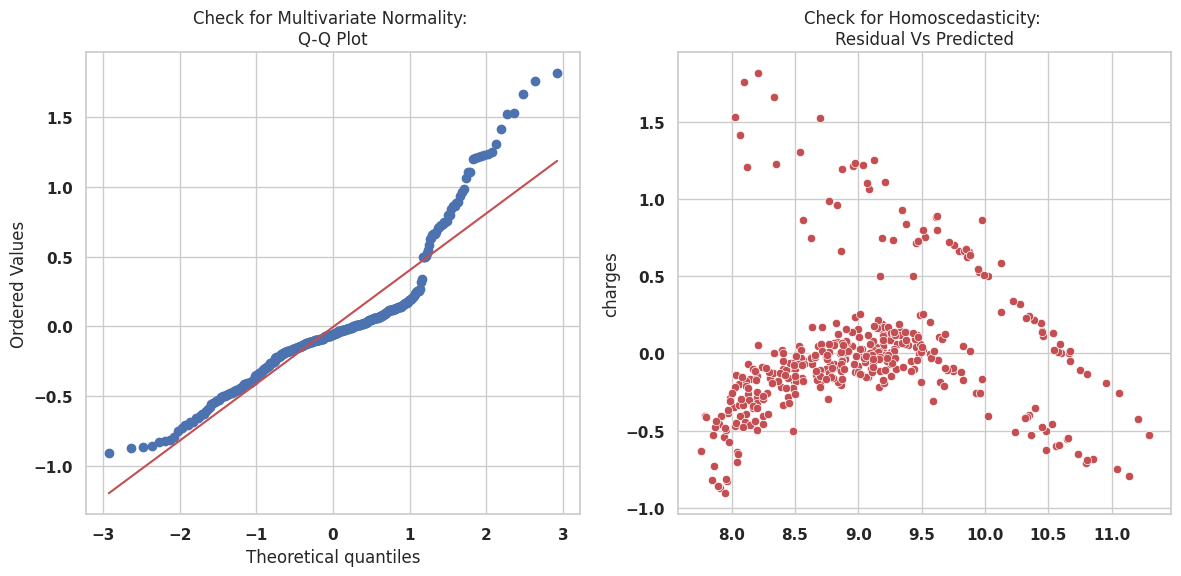

In [64]:
# Check for Multivariate Normality
# Quantile- Quantile plot
f,ax = plt.subplots(1,2,figsize = (14, 6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [65]:
# Check for Multicollinearity
# Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536561945911138